# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### popular clustering algorithm used in unsupervised machine learning. Unlike K-Means, DBSCAN can find clusters of arbitrary shapes and handle noise (outliers) effectively.

#### ON MOON DATASET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [2]:
x,_=make_moons(n_samples=300,noise=0.1)

In [3]:
print(x)

[[-0.47675458  1.00368063]
 [-0.04042083  0.92169517]
 [ 0.39402556 -0.33488848]
 [ 0.04344795  0.43315673]
 [-0.78745218  0.54756876]
 [-0.65302863  0.84944404]
 [ 0.18021414  0.46397659]
 [ 0.0665378   0.03549708]
 [ 0.84471386  0.56524215]
 [ 1.89712441  0.10341748]
 [ 0.63533324  0.71342457]
 [ 1.98129648  0.33838019]
 [ 0.72295973 -0.55368914]
 [-1.05455024  0.54302549]
 [ 1.89524265  0.02001577]
 [ 0.29890839 -0.14815564]
 [ 0.3535021  -0.03130711]
 [ 1.00941777 -0.4379787 ]
 [-0.91564592  0.78821946]
 [ 2.03944378  0.19748215]
 [-0.10073179  0.38565276]
 [-0.32105077  0.92799125]
 [-0.1945824   1.00661359]
 [ 1.5587859  -0.39471203]
 [ 1.83172571  0.10051475]
 [ 0.89423241 -0.51572977]
 [-0.99955885  0.47253332]
 [ 0.43898876  0.78913759]
 [ 0.46931821  0.80550036]
 [ 1.49417462 -0.4847336 ]
 [ 1.04856647  0.17315712]
 [ 0.3918345  -0.23032976]
 [ 0.66448717  0.62567828]
 [ 1.78019208 -0.10894456]
 [-0.66955613  0.61185808]
 [ 1.79390511 -0.07907059]
 [-0.70038167  0.75807455]
 

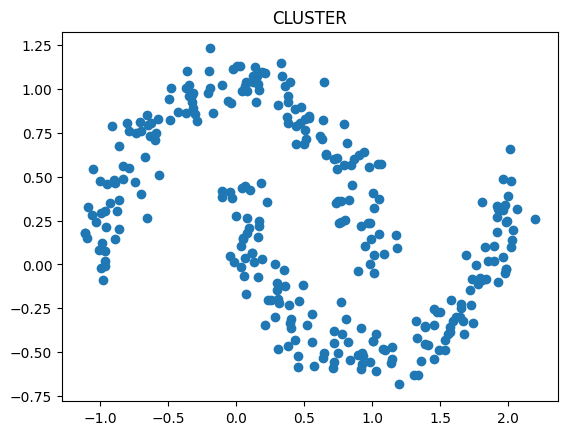

In [4]:
plt.scatter(x=x[:,0],y=x[:,1])
plt.title('CLUSTER')
plt.show()

In [5]:
cluster=DBSCAN(eps=0.2,min_samples=5)
labels=cluster.fit_predict(x)

In [6]:
print(labels) # as the position of each element in which cluster

[ 0  0  1  1  0  0  1  1  0  1  0  1  1  0  1  1  1  1  0  1  1  0  0  1
  1  1  0  0  0  1  0  1  0  1  0  1  0  1  0  0  0  0  0  0  0  1  0  1
  1  0  0  0  0  0  1  1  1  0  1  0  1  0  1  0  1  0  1  1  1  0  0  0
  1  1  0  1  1  1  1  0  0  0  0  1  1  1  1  1  1  1  0  1  0  0  0  0
  0  1  1  1  1  1  1  0  1  0  0  1  0  1  1  1  1  1  1  1  0  0  1  0
  1  0  0  0  1  0  1  1  1  0  1  1  0  0  0  0  1  0  0  1  1  1  1  1
  0  1  1  0  0  1  0  1  0  1  0  1  0  0  0  0  0  1  0  0  0  1  1  1
  0  0  0  0  1  0  0  1  1  1  1  0  0  1  0  1  0  1  1  1  1  1  0  1
  0  1  0  0  0  1  1  1  0  1  1  1  1  1  0  0  0  1  0  0  1  0  0  0
  0  0  0  0  1  1  0  0  0  0  0  1  1  0  1  1  0  1  0  0  1  1  0  0
  1  0  1  0  1  1  1  0  1  0  1  1  1  0  1  1  0  0  0  1  0  1  1  1
  1  1  0  0  1  0  0  1  1  0  0  1  0  0  0  0  1  1  1  0  1  1  0  0
  1  0  0 -1  1  1  0  0  0  0  0  1]


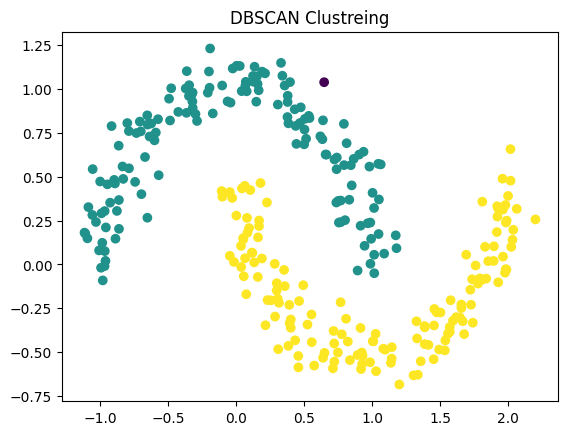

In [7]:
plt.scatter(x=x[:,0],y=x[:,1],c=labels,cmap='viridis')
plt.title('DBSCAN Clustreing')
plt.show()

### Creating random weight and height cluster

In [8]:
rng=np.random.default_rng(seed=42)
data=rng.random(size=(100,2))

In [9]:
height=np.array(data[:,0])
weight=np.array(data[:,1])
idx=['people'+str(i) for i in range(1,101)]
idx=np.array(idx)

In [10]:
print(height.shape)
print(weight.shape)
print(idx.shape)

(100,)
(100,)
(100,)


In [11]:
import pandas as pd
df=pd.DataFrame(columns=['height','weight'],index=idx)
df.head()

,height,weight
people1,NaN,NaN
people2,NaN,NaN
people3,NaN,NaN
people4,NaN,NaN
people5,NaN,NaN


In [12]:
for i,val in enumerate(df.index):
    df.loc[val,'height']=height[i]*1000
    df.loc[val,'weight']=weight[i]*100

In [13]:
df.head()

,height,weight
people1,773.956049,43.887844
people2,858.59792,69.736803
people3,94.177348,97.562235
people4,761.139702,78.606431
people5,128.113633,45.038594


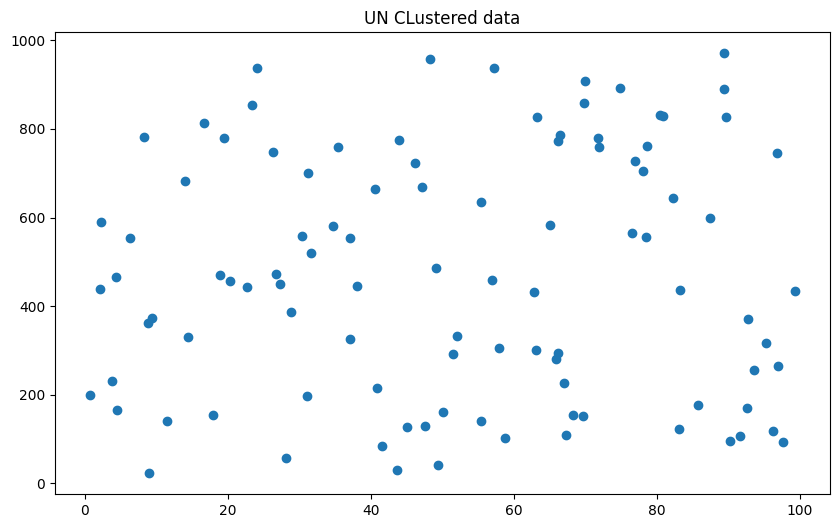

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['weight'],y=df['height'])
plt.title('UN CLustered data')
plt.show()

In [15]:
# doing dbscan on data
db=DBSCAN(eps=50,min_samples=5)
labels=db.fit_predict(df)

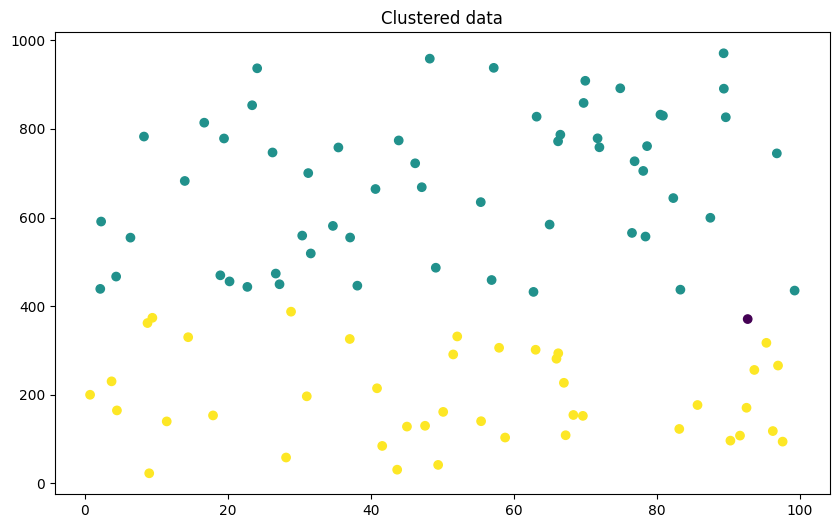

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['weight'],y=df['height'],c=labels,cmap='viridis')
plt.title('Clustered data')
plt.show()

#### If all the data points are too far apart (based on eps), DBSCAN might label most or all points as noise (label = -1).